# Week 5 Quiz

## Hongwei Zha - hz2816

### Instructions

Replace the Name and UNI in cell above and the notebook name

Replace all '____' below using the instructions provided.

When completed, 
 - make sure you've replaced Name and UNI in the first cell and filename (eg: week_05_quiz-hw2592)
 - Click the github link shared on canvas for quiz5 to generate your own repository of quiz5
 - Click your own repository of quiz5 to commit your answers to github

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# Sklearn provides a set of commonly used example datasets. 
# They can be accessed through the datasets submodule.
from sklearn import datasets

# We're going to use the Linnerud dataset to practice Regression in sklearn.

# The Linnerud dataset is a tiny multi-output regression dataset. It consists 
# of three excercise (data) and three physiological (target) variables 
# collected from twenty middle-aged men in a fitness club.
linnerud = datasets.load_linnerud()

# The features of the dataset contain data on 3 exercises
# Chins - number of chinups
# Situps - number of situps
# Jumps - number of jumping jacks

# Note that the features and target come as numpy matrices.
# We'll first load the features into a pandas dataframe.
df = pd.DataFrame(linnerud.data,columns=linnerud.feature_names)

# We'll also add the target to our dataframe.
# Note also that this dataset contains multiple targets.
# We'll only consider one of them: Weight
df['Weight'] = linnerud.target[:,linnerud.target_names.index('Weight')]

# For more information on the dataset, uncomment the print command below
print(linnerud.DESCR)

# print the first 3 rows
df.head(3)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



,Chins,Situps,Jumps,Weight
0,5.0,162.0,60.0,191.0
1,2.0,110.0,60.0,189.0
2,12.0,101.0,101.0,193.0


<AxesSubplot:xlabel='Situps', ylabel='Weight'>

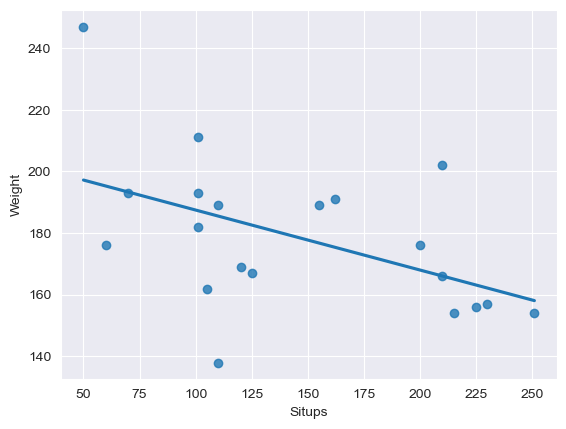

In [12]:
# What is the relationship between Situps and Weight?

# Plot a scatterplot and best-fit line for x=Situps vs y=Weight
#    using seaborn sns.regplot()
sns.regplot(x = df.Situps, y = df.Weight, ci = None)

In [33]:
# The above plot should indicate a negative relationship 
#    between Situps and Weight
# How much does Weight go down if Situps goes up?
# To answer this we'll train a simple linear model.

# First import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Create a variable X containing the independent variable 'Situps'
# Note that sklearn expects X to be two dimensional
#   so you must use one of the methods discussed in class
#   to return a two dimensional object
X = np.array(df['Situps']).reshape(-1,1)

# Create a variable y containing the dependent variable 'Weight'
# Note that y should only be one dimensional, 
#    so a Series (single column of a dataframe) works fine here
y = np.array(df['Weight'])

# Instantiate a LinearRegression object with default parameter settings
#   and store as lr
lr = LinearRegression()

# Fit lr using the X and y defined above
lr.fit(X,y)

# Using the learned parameters in coef_ and intercept_, 
#   by how much do we expect Weight to go down when Situps goes up by 1?
# Print with a precision of 2
print(f"We expect Weight go down by {abs(lr.coef_[0]):.2f} when Situps goes up by 1")

# Using the learned parameters in coef_ and intercept_, 
#   what should we expect weight to be when when Situps is 0?
# Print with a precision of 2
print(f"We expect Weight to be {lr.intercept_:.2f} when Situps is 0")

We expect Weight go down by 0.19 when Situps goes up by 1
We expect Weight to be 206.92 when Situps is 0


In [34]:
# How is Weight related to all 3 features?

# Create a list containing the 3 feature names we're interested in 
#    as strings: Chins, Situps, Jumps
# Store as feature_names
# We'll do this to make sure we don't include 'Weight' in the 
#    regression as an independent variable
feature_names = ['Chins', 'Situps', 'Jumps']

# Instantiate a second LinearRegression model with default parameters
#    and store as mlr
# Fit this model using all of the columns in feature_names
# Note that here we can pass the 2D dataframe without needing to .reshape(), etc.
mlr = LinearRegression()
mlr.fit(df[feature_names],y)

# For each feature name in feature_names, print out the name and 
#    corresponding learned coefficient
# It looks like one of the features actually has a positive relationship. 
# Print coefficient values with a precision of 2.
print(f"Chins: {mlr.coef_[0]:.2f}")
print(f"Situps: {mlr.coef_[1]:.2f}")
print(f"Jumps: {mlr.coef_[2]:.2f}")

Chins: -0.48
Situps: -0.22
Jumps: 0.09


In [41]:
# NOT REQUIRED

# For those that are interested exploring how statsmodels works

# Import the statsmodels api as sm
import statsmodels.api as sm

# Store the 3 features from df as X
X = df[feature_names]

# Add a constant to X (in order to learn the bias term) using sm.add_constant()
X = sm.add_constant(X)

# Instantiate and fit an OLS model using X and df.Weight as y 
#   and store as sm_model
# Note that in OLS, the target y is the first parameter!
sm_model = sm.OLS(df.Weight,X)

# Display the model summary
# Note that the coefficients in the summary match the values
#    found above using sklearn
sm_model.fit().params

const     208.233519
Chins      -0.475026
Situps     -0.217716
Jumps       0.093088
dtype: float64